## Regression Project

### Task:
Predict the 40 yard dash of a nfl player

### Dataset Given:
We will work with a dataset that contains NFL combine data of NFL prospects from the years 2000-2018. This dataet was obtained from kaggle and can be found in this link: https://www.kaggle.com/datasets/savvastj/nfl-combine-data?select=combine_data_since_2000_PROCESSED_2018-04-26.csv

### Problem:
Not all players who enter the NFL combine participate in the 40 yard dash. 40 yard dash is an important metic that teams use to measure the speed of a player and has a great impact on the player's value and their draft position value.

### Objective/Solution:
Create a machine learning algorithm that will predict the 40 yard dash based on the sample data from combines from 2000 to 2018. We want to create a model that will predict the 40 yard dash time ('Forty') of a player regardless of his postion. We will use data from multiple columns that correlate and have a relationship to the 'Forty' column. This will be useful to predict the 40 yard dash time of a player who enters the combine and do not participate in the 40 yard dash or is unable to particapate.

### Dataset information
- 16 attributes
- 6218 instances

### IMPORT DATASET AND PERFORM BASIC STATISTICAL DATA ANALYSIS

In [256]:
# Import Pandas Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
# Force Pandas to display all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [258]:
# Read a CSV file using Pandas as follows
df = pd.read_csv('combine_data.csv')
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,Chris Worley,ILB,74,238,4.86,29.5,15.0,NaN,NaN,NaN,2018,WorlCh00,0.0,NaN,NaN,NaN
6214,Isaiah Wynn,G,75,313,NaN,NaN,NaN,NaN,NaN,NaN,2018,WynnIs00,0.0,NaN,NaN,NaN
6215,Isaac Yiadom,CB,73,190,4.52,NaN,8.0,120.0,NaN,4.18,2018,YiadIs00,0.0,NaN,NaN,NaN
6216,Kenny Young,ILB,73,236,4.60,36.0,23.0,117.0,7.38,4.48,2018,NaN,0.0,NaN,NaN,NaN


In [259]:
# Get the datatype 
type(df)

pandas.core.frame.DataFrame

In [260]:
# Get info to see that there are 16 features in total
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     6218 non-null   object 
 1   Pos        6218 non-null   object 
 2   Ht         6218 non-null   int64  
 3   Wt         6218 non-null   int64  
 4   Forty      6046 non-null   float64
 5   Vertical   4796 non-null   float64
 6   BenchReps  4212 non-null   float64
 7   BroadJump  4754 non-null   float64
 8   Cone       3993 non-null   float64
 9   Shuttle    4063 non-null   float64
 10  Year       6218 non-null   int64  
 11  Pfr_ID     4895 non-null   object 
 12  AV         6218 non-null   float64
 13  Team       3738 non-null   object 
 14  Round      3738 non-null   float64
 15  Pick       3738 non-null   float64
dtypes: float64(9), int64(3), object(4)
memory usage: 777.4+ KB


In [261]:
# Obtain a Statistical Summary about the data
df.describe()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick
count,6218.000000,6218.000000,6046.000000,4796.000000,4212.000000,4754.000000,3993.000000,4063.000000,6218.000000,6218.000000,3738.000000,3738.000000
mean,73.798971,243.372145,4.783784,32.818599,20.926163,113.943837,7.282307,4.390603,2009.041975,5.085719,3.838684,113.728464
std,2.621373,45.103814,0.305984,4.213729,6.393679,9.317031,0.422882,0.268836,5.471056,7.546556,1.952728,70.605155
min,65.000000,149.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000,-4.000000,1.000000,1.000000
25%,72.000000,206.000000,4.540000,30.000000,16.000000,108.000000,6.970000,4.190000,2004.000000,0.000000,2.000000,53.000000
50%,74.000000,233.000000,4.700000,33.000000,21.000000,115.000000,7.190000,4.350000,2009.000000,1.000000,4.000000,108.000000
75%,76.000000,281.000000,4.980000,35.500000,25.000000,121.000000,7.540000,4.560000,2014.000000,8.000000,5.000000,169.000000
max,82.000000,375.000000,6.050000,46.000000,49.000000,147.000000,9.120000,5.560000,2018.000000,51.000000,7.000000,260.000000


### DEALING WITH MISSING DATA AND DROPPING UNWANTED COLUMNS

In [262]:
# Drop unwanted columns and obvious unrelated columns to 'Forty' column.
df.drop(['Pos','Player', 'Year', 'Pfr_ID', 'AV', 'Team', 'Round', 'Pick'], axis=1, inplace=True)
df.head()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
0,76,252,4.55,NaN,NaN,NaN,NaN,NaN
1,72,218,4.58,NaN,NaN,NaN,NaN,NaN
2,76,334,5.56,25.0,23.0,94.0,8.48,4.98
3,74,253,4.97,29.0,NaN,104.0,7.29,4.49
4,74,206,4.55,34.0,NaN,123.0,7.18,4.15


In [263]:
# Let's locate rows that have Null values
df.isnull().sum()

Ht              0
Wt              0
Forty         172
Vertical     1422
BenchReps    2006
BroadJump    1464
Cone         2225
Shuttle      2155
dtype: int64

In [264]:
# Drop any row that contains a Null value 
df.dropna(how = 'any', inplace = True)

In [265]:
# Let's check if we still have any missing values
df.isnull().sum()

Ht           0
Wt           0
Forty        0
Vertical     0
BenchReps    0
BroadJump    0
Cone         0
Shuttle      0
dtype: int64

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 2 to 6217
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ht         2885 non-null   int64  
 1   Wt         2885 non-null   int64  
 2   Forty      2885 non-null   float64
 3   Vertical   2885 non-null   float64
 4   BenchReps  2885 non-null   float64
 5   BroadJump  2885 non-null   float64
 6   Cone       2885 non-null   float64
 7   Shuttle    2885 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 202.9 KB


### PANDAS OPERATIONS/FILTERING

In [267]:
# Find athletes that run a 40 yard dash in 4.3 seconds or less
fastest_athletes = df[(df['Forty'] <= 4.3)]
fastest_athletes

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
1939,69,176,4.30,39.0,16.0,124.0,6.97,3.96
2858,73,184,4.29,38.5,17.0,131.0,6.74,4.17
3056,74,210,4.30,38.5,16.0,126.0,6.80,4.18
3353,69,186,4.28,33.5,15.0,115.0,7.00,4.44
3664,73,176,4.28,33.5,5.0,121.0,6.97,4.09
4169,70,199,4.29,38.5,17.0,133.0,6.55,3.97
4575,68,173,4.26,38.0,20.0,122.0,6.86,4.06
5767,70,200,4.28,37.5,13.0,124.0,7.06,4.22


In [268]:
# Find athletes that run a 4.3 or less and have a vertical more than 38 inches

mask_1 = df['Forty'] <= 4.3
mask_2 = df['Vertical'] > 38

top_athletes = df[mask_1 & mask_2]
top_athletes

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
1939,69,176,4.30,39.0,16.0,124.0,6.97,3.96
2858,73,184,4.29,38.5,17.0,131.0,6.74,4.17
3056,74,210,4.30,38.5,16.0,126.0,6.80,4.18
4169,70,199,4.29,38.5,17.0,133.0,6.55,3.97


### HISTOGRAM AND CORRELATION

array([[<AxesSubplot:title={'center':'Ht'}>,
        <AxesSubplot:title={'center':'Wt'}>,
        <AxesSubplot:title={'center':'Forty'}>],
       [<AxesSubplot:title={'center':'Vertical'}>,
        <AxesSubplot:title={'center':'BenchReps'}>,
        <AxesSubplot:title={'center':'BroadJump'}>],
       [<AxesSubplot:title={'center':'Cone'}>,
        <AxesSubplot:title={'center':'Shuttle'}>, <AxesSubplot:>]],
      dtype=object)

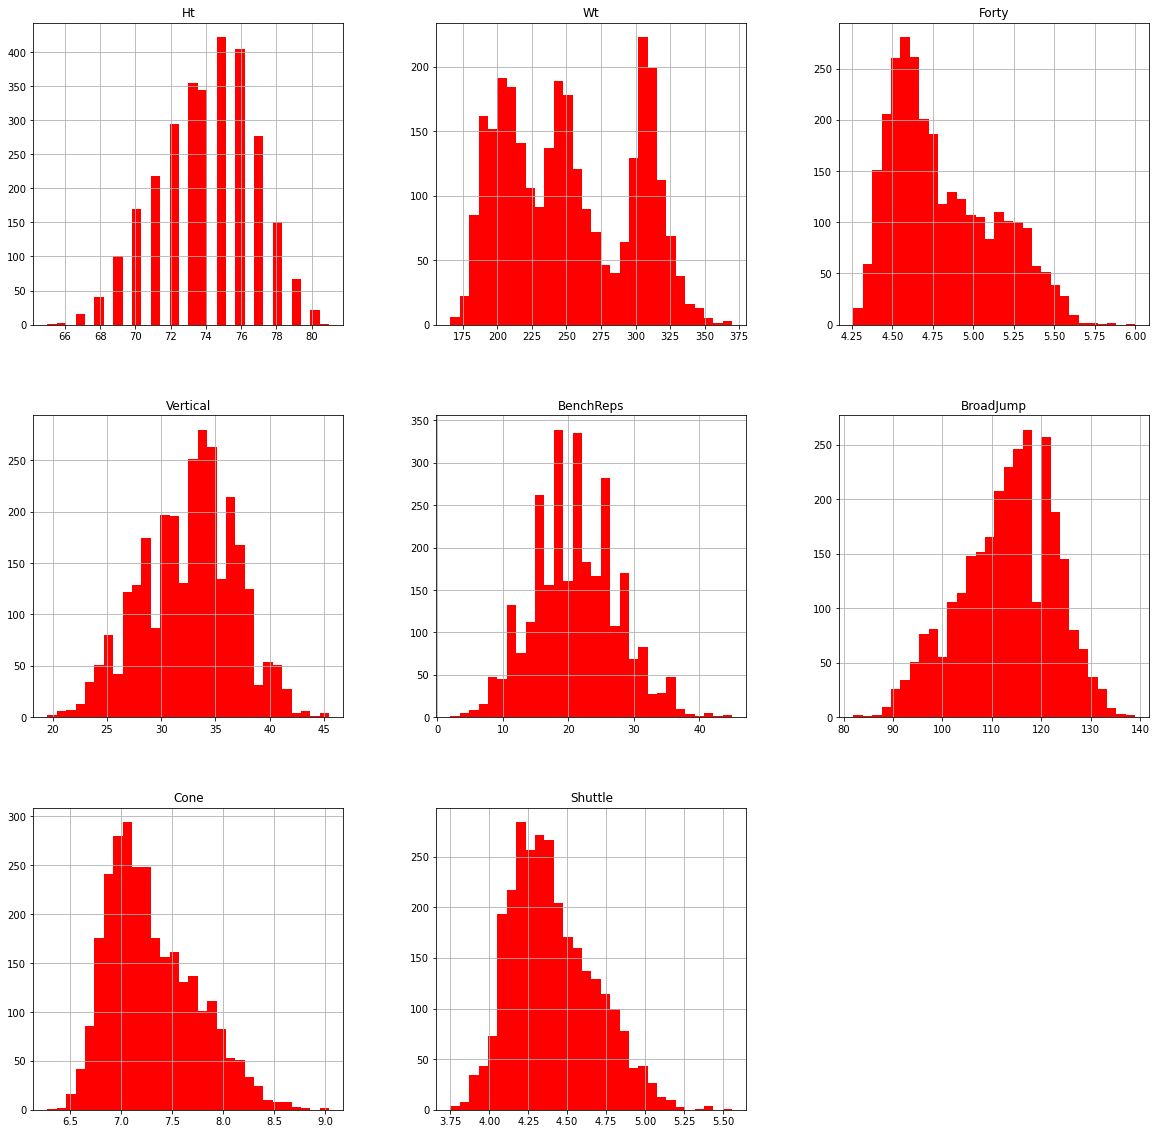

In [269]:
# Make a quick histogram of the df dataframe
df.hist(bins = 30, figsize = (20,20), color = 'r')
# Several features are tail heavy

<AxesSubplot:>

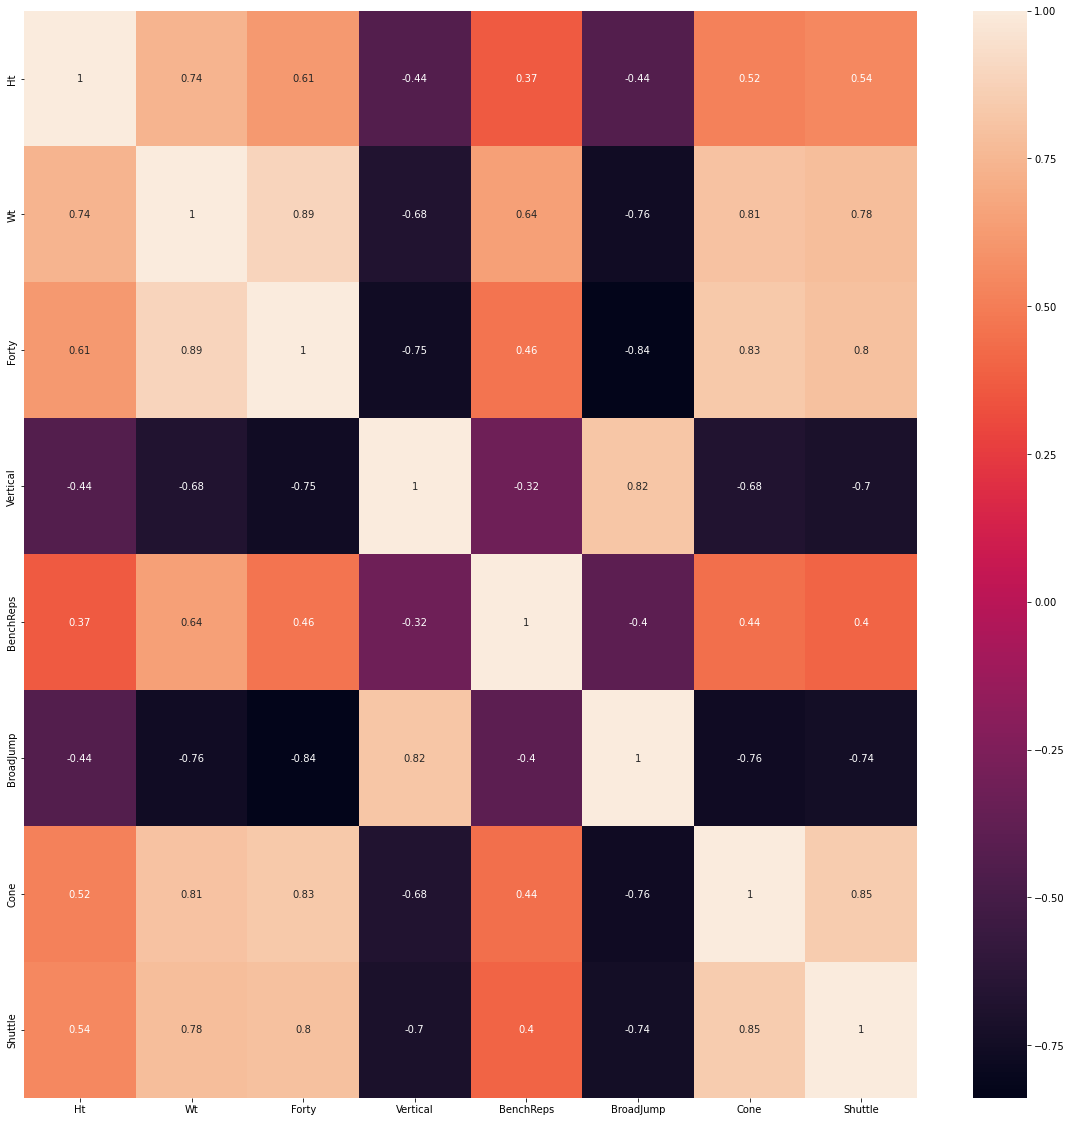

In [270]:
# Create a heatmap of the correlations
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

## EFFECTIVE DATA VISUALIZATION WITH SEABORN

<AxesSubplot:xlabel='Wt', ylabel='Forty'>

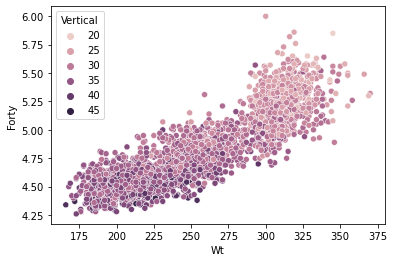

In [271]:
# Plot a scatter plot showing 'Followers' and 'Influence Score' and show 'Country Or Region'
sns.scatterplot(x = 'Wt', y = 'Forty', hue = 'Vertical', data = df)
# We can see that athletes that weigh less have higher verticals and lower 40 yard dash times.

/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

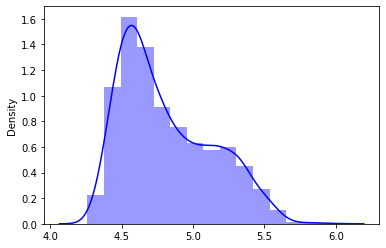

In [272]:
# Plot the distplot 
# Displot combines matplotlib histogram function with kdeplot() (Kernel density estimate)
# KDE is used to plot the Probability Density of a continuous variable. 

sns.distplot(x = df['Forty'], bins = 15, color = 'blue')
# This plot shows that the majority of athletes had a 4.6-4.7 estimated 'Forty' yard dash time.

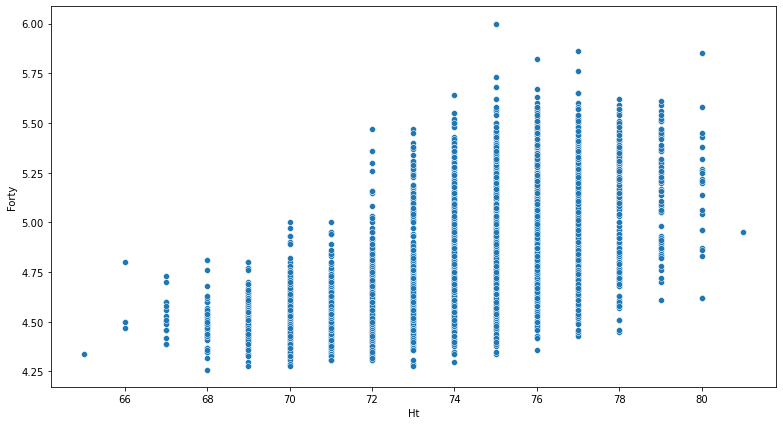

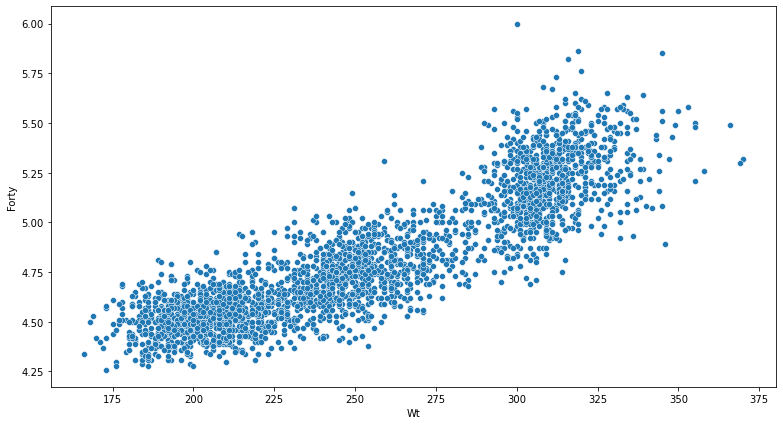

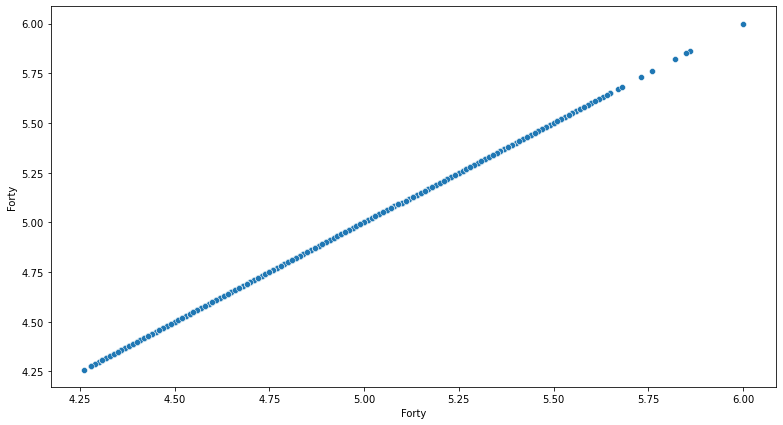

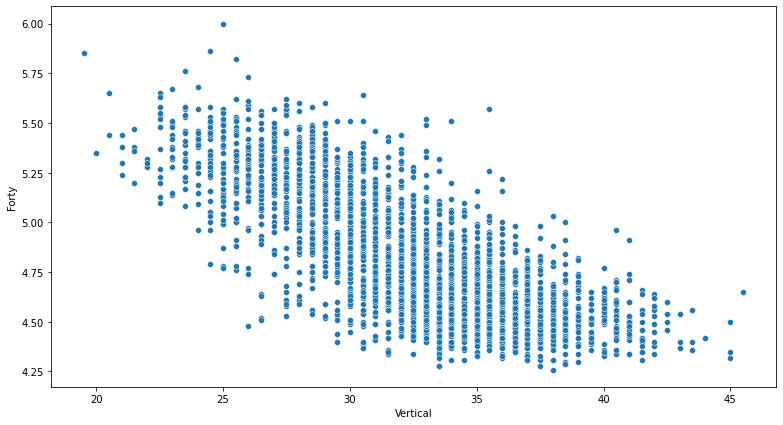

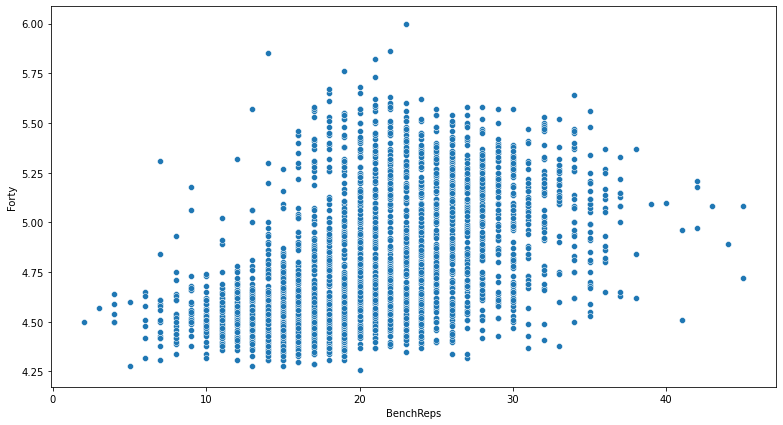

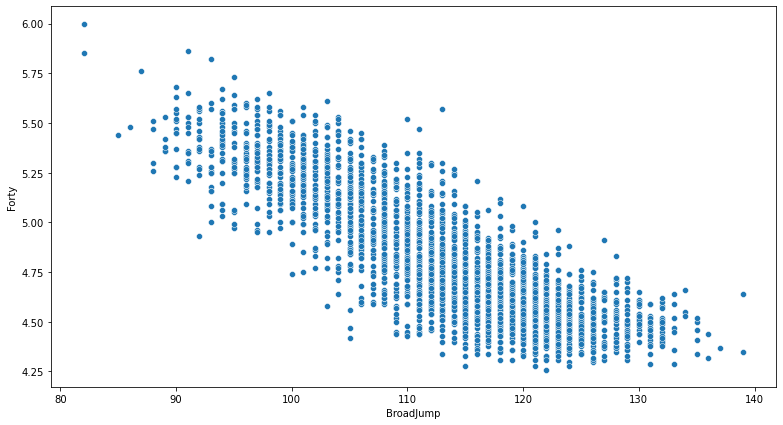

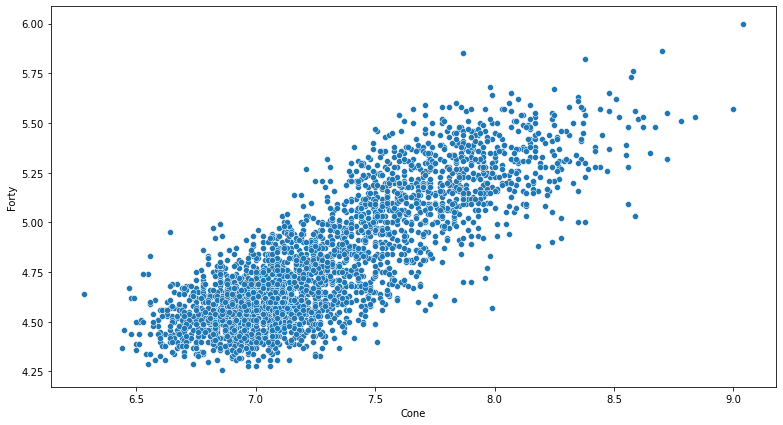

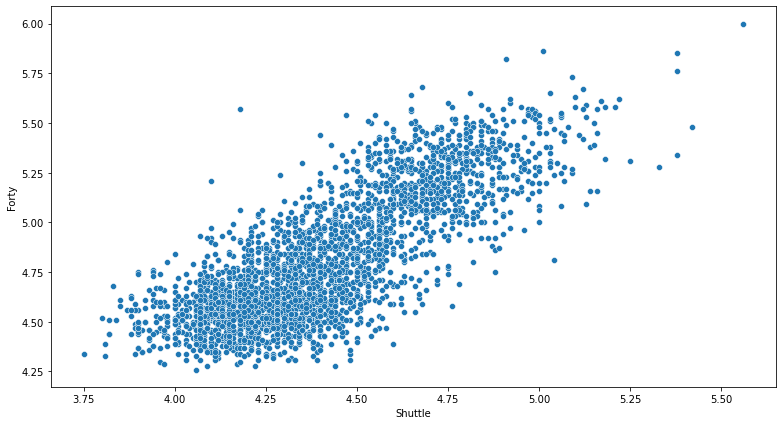

In [273]:
# Plot a scatterplot for each column in df dataframe to show coorelation to the 'Forty' column
for i in df.columns:
  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Forty', hue_norm = (1,5), data = df)
  plt.show()

### PREPARE THE DATA BEFORE MODEL TRAINING

In [274]:
df

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
2,76,334,5.56,25.0,23.0,94.0,8.48,4.98
7,72,237,4.72,31.0,21.0,112.0,7.96,4.39
9,69,175,4.44,35.0,17.0,119.0,7.03,4.14
11,78,312,5.34,28.0,20.0,96.0,7.72,4.73
12,72,208,4.62,35.0,10.0,114.0,6.92,4.32
...,...,...,...,...,...,...,...,...
6202,76,221,4.67,34.0,9.0,114.0,7.24,4.37
6204,77,296,5.05,34.0,26.0,112.0,7.83,4.63
6206,74,197,4.55,37.0,9.0,121.0,6.89,4.23
6216,73,236,4.60,36.0,23.0,117.0,7.38,4.48


In [275]:
X = df.drop(columns = ['Forty'])

In [276]:
y = df['Forty']

In [277]:
X.shape

(2885, 7)

In [278]:
y.shape

(2885,)

In [279]:
X = np.array(X)
y = np.array(y)

In [280]:
# reshaping the array from (2885,) to (2885, 1)
y = y.reshape(-1,1)
y.shape

(2885, 1)

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [282]:
X_train.shape

(2163, 7)

In [283]:
X_test.shape

(722, 7)

### TRAIN & EVALUATE AN XG-BOOST ALGORITHM

In [284]:
!pip install xgboost

In [285]:
# Train an XGBoost regressor model 

import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [286]:
# Predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8771210012259869


In [287]:
# Make predictions on the test data
y_predict = model.predict(X_test)

In [288]:
y_predict

array([4.72, 5.27, 4.7 , 5.05, 4.47, 4.63, 4.46, 5.31, 4.91, 4.78, 4.71,
       5.29, 4.48, 4.66, 4.48, 4.62, 4.95, 4.7 , 5.08, 4.58, 4.46, 4.55,
       5.13, 4.45, 4.57, 4.67, 4.57, 5.33, 4.55, 4.4 , 5.41, 5.46, 5.27,
       5.08, 5.15, 4.52, 4.86, 4.8 , 4.66, 4.54, 5.27, 5.11, 5.26, 5.15,
       5.19, 4.55, 4.49, 4.48, 5.19, 4.55, 4.69, 5.3 , 4.77, 4.62, 4.61,
       4.5 , 5.23, 5.26, 4.55, 4.49, 4.69, 4.53, 4.58, 5.29, 4.55, 5.29,
       4.56, 5.29, 4.52, 5.18, 5.17, 4.68, 4.79, 4.83, 4.47, 4.72, 4.98,
       5.11, 4.53, 5.09, 4.53, 4.5 , 5.2 , 5.  , 5.08, 4.61, 4.77, 4.57,
       4.56, 5.34, 5.24, 4.63, 4.81, 4.69, 4.52, 4.49, 4.83, 5.11, 5.16,
       4.65, 4.72, 4.49, 4.57, 5.13, 4.49, 5.13, 4.7 , 5.37, 4.9 , 4.48,
       4.52, 4.84, 5.19, 4.48, 4.67, 5.15, 5.17, 5.04, 4.57, 4.55, 5.33,
       4.68, 4.78, 5.27, 5.37, 5.41, 4.51, 4.81, 5.42, 4.68, 4.8 , 4.92,
       5.39, 5.17, 4.66, 4.83, 5.25, 5.22, 4.71, 5.3 , 5.19, 4.53, 4.54,
       5.37, 4.55, 4.55, 4.55, 4.76, 4.71, 5.34, 4.

In [289]:
# Find the rmse, r2_score, mean_squared_error and mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.114 
MSE = 0.013083237923757974 
MAE = 0.08906139519075937 
R2 = 0.8771210012259869


## Individual predication
- Make an individual predication with the values (75, 218, 41, 32, 120, 6.8, 4.17) for the 'Ht, Wt', 'Vertical', 'BenchReps', 'BroadJump', 'Cone', 'Shuttle' columns.

In [290]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [292]:
print(regressor.predict([[75, 218, 41, 32, 120, 6.8, 4.17]]))
# The model predicts a 40 yard dash time of 4.44 for these inputed values.

[[4.44]]


# Conculsion (87.7% Accuracy)

- The model that was created has a 87.7% accuracy.
- This model can be helpful for NFL teams who need to chose the right players in NFL drafts based on their speed (40 yard dash time). Speed is usually concluded from the 40 yard dash test and is the single most important test an NFL skilled player will take to determine their speed.
- This model can give teams more insight and help make the best decision for their organization when drafting if a player has no 40 yard dash time from the NFL combine.